In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import os

In [2]:
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rc('font', family='NanumGothic')

In [3]:
os.getcwd()

'C:\\Users\\junoh\\OneDrive\\마루경영지도사무소\\성남산업진흥원'

In [4]:
dt = pd.read_csv('국민건강보험공단_건강검진정보_20211229.csv', encoding = 'cp949')

In [5]:
dt.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [7]:
dt.rename(columns = {'가입자 일련번호' : 'ID', '성별코드' : 'sex',   '신장(5Cm단위)' : 'height', '체중(5Kg 단위)' : 'weight', '시력(좌)' : 'vision_left',  '시력(우)' : 'vision_right'}, inplace = True)

In [8]:
dt.rename(columns = {'연령대 코드(5세단위)' : 'age'}, inplace = True)

In [9]:
dt.rename(columns =  {'수축기 혈압' : 'systolic_b_pressure', '이완기 혈압' : 'diastolic b_pressure', '식전혈당(공복혈당)' : 'pre-meal_b_sugar'}, inplace = True)

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   기준년도                  1000000 non-null  int64  
 1   ID                    1000000 non-null  int64  
 2   시도코드                  1000000 non-null  int64  
 3   sex                   1000000 non-null  int64  
 4   age                   1000000 non-null  int64  
 5   height                1000000 non-null  int64  
 6   weight                1000000 non-null  int64  
 7   허리둘레                  999892 non-null   float64
 8   vision_left           999743 non-null   float64
 9   vision_right          999748 non-null   float64
 10  청력(좌)                 999778 non-null   float64
 11  청력(우)                 999770 non-null   float64
 12  systolic_b_pressure   992468 non-null   float64
 13  diastolic b_pressure  992466 non-null   float64
 14  pre-meal_b_sugar      992398 non-nu

In [11]:
#  분석 대상 Column 만 추출
df = dt.iloc[:, [1, 3, 4, 5, 6, 8 , 9, 12, 13, 14]]

In [12]:
df.head()

,ID,sex,age,height,weight,vision_left,vision_right,systolic_b_pressure,diastolic b_pressure,pre-meal_b_sugar
0,1,1,9,165,60,1.2,1.5,127.0,79.0,90.0
1,2,2,13,150,65,0.8,0.8,110.0,73.0,87.0
2,3,2,12,155,55,0.6,0.7,123.0,80.0,102.0
3,4,1,13,160,70,1.0,1.0,134.0,84.0,146.0
4,5,2,12,155,50,1.5,1.2,144.0,89.0,110.0


In [13]:
df.shape  #  1백만 index 및 11개 feature )

(1000000, 10)

In [14]:
#  파생변수 생성 : difference between visiotn_left and vision_right
df['vision_diff'] =abs( df['vision_left'] - df['vision_right'])

C:\Users\junoh\AppData\Local\Temp/ipykernel_10236/2976784113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vision_diff'] =abs( df['vision_left'] - df['vision_right'])


In [15]:
df.head()

,ID,sex,age,height,weight,vision_left,vision_right,systolic_b_pressure,diastolic b_pressure,pre-meal_b_sugar,vision_diff
0,1,1,9,165,60,1.2,1.5,127.0,79.0,90.0,0.3
1,2,2,13,150,65,0.8,0.8,110.0,73.0,87.0,0.0
2,3,2,12,155,55,0.6,0.7,123.0,80.0,102.0,0.1
3,4,1,13,160,70,1.0,1.0,134.0,84.0,146.0,0.0
4,5,2,12,155,50,1.5,1.2,144.0,89.0,110.0,0.3


In [16]:
print(df['age'].value_counts())
print(df['sex'].value_counts())

11    175705
9     156277
13    155096
10    144165
12    142089
14     86653
15     73714
16     36663
17     23401
18      6237
Name: age, dtype: int64
1    510689
2    489311
Name: sex, dtype: int64


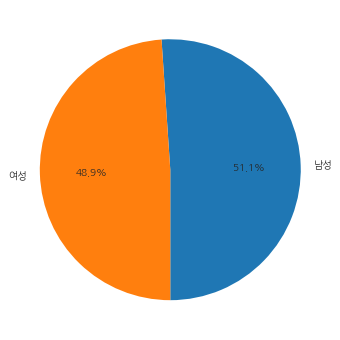

In [17]:
#   검짐데이터 기초 분석
# 1) 성별 분포
x = ['남성', '여성']
y= [510689, 489311]
plt.figure(figsize = (10, 6))
plt.pie(y, labels = x, autopct ='%.1f%%' , startangle =270 )
plt.show()

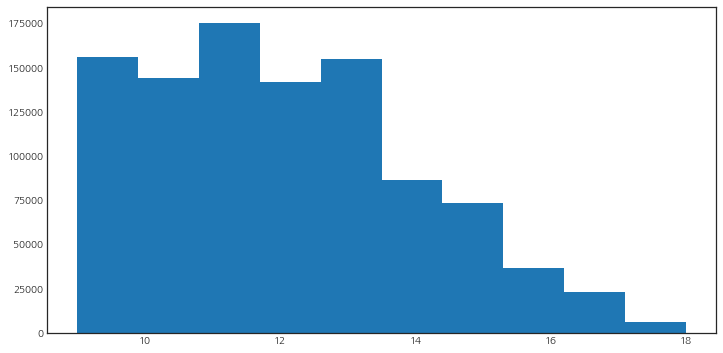

In [18]:
# 2) age 별 분포
age_group = ['41~45', '46~50', '51~55', '56~60', '61~65', '66~70', '71~75', '75~80', '81~85', '86~90']
plt.figure(figsize = (12, 6))
plt.hist(df['age'], histtype = 'bar')
plt.show()

##### 1. 성별 시력 분포

In [19]:
# 시력(좌) 
df_by_sex = df.groupby('sex')['vision_left', 'vision_right'].mean()
df_by_sex

C:\Users\junoh\AppData\Local\Temp/ipykernel_10236/4018142339.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_sex = df.groupby('sex')['vision_left', 'vision_right'].mean()


,vision_left,vision_right
sex,,
1,0.98318,0.988278
2,0.88072,0.879468


#####  2. 연령대별 시력 분포

In [20]:
# 시력(좌) 
df_by_age = df.groupby('age')['vision_left', 'vision_right'].mean()
df_by_age

C:\Users\junoh\AppData\Local\Temp/ipykernel_10236/3135355686.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_age = df.groupby('age')['vision_left', 'vision_right'].mean()


,vision_left,vision_right
age,,
9,1.074190,1.070411
10,1.013562,1.011263
11,0.974431,0.976357
12,0.940721,0.943622
13,0.876169,0.880179
14,0.817555,0.824614
15,0.784676,0.792073
16,0.764188,0.757936
17,0.725754,0.749793


No handles with labels found to put in legend.


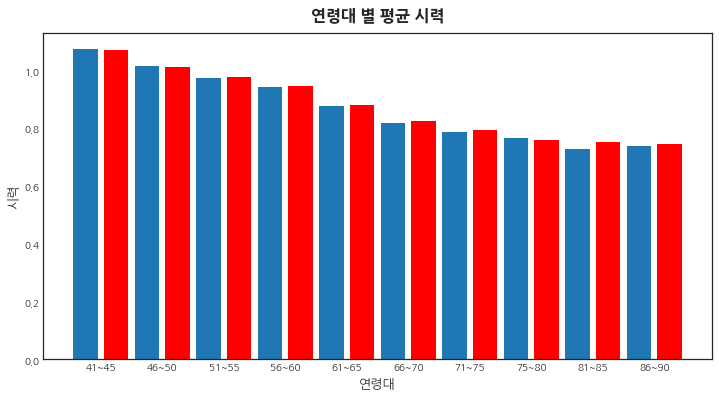

In [21]:
age_group = ['41~45', '46~50', '51~55', '56~60', '61~65', '66~70', '71~75', '75~80', '81~85', '86~90']
x = np.arange(10)
bar_width = 0.5
plt.figure(figsize=(12, 6))
plt.bar(x, df_by_age['vision_left'],  width = 0.4)
plt.bar(x + bar_width, df_by_age['vision_right'], color = 'r', width = 0.4)
plt.xticks(x +0.25, age_group)
plt.xlabel('연령대', size = 13)
plt.ylabel('시력', size = 13)
plt.title('연령대 별 평균 시력', size = 16, pad = 14, fontweight = 'bold')
plt.legend(loc = 'best')
plt.show()

2.1 연령대별 좌우시력 차이

In [22]:
df_diff_by_age = df.groupby('age')['vision_diff'].mean()
df_diff_by_age

age
9     0.184462
10    0.189258
11    0.201260
12    0.214125
13    0.232001
14    0.249610
15    0.305031
16    0.374133
17    0.411227
18    0.451905
Name: vision_diff, dtype: float64

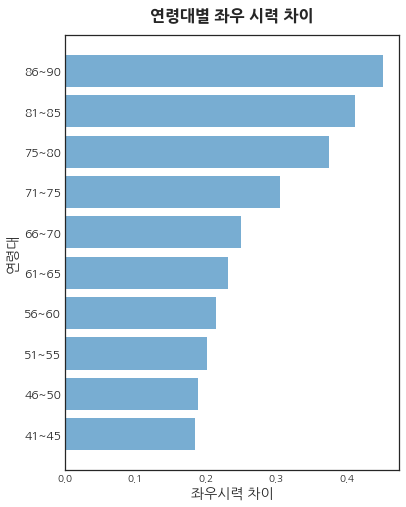

In [23]:
x = np.arange(10)
plt.figure(figsize = (6,8))
plt.barh(x, df_diff_by_age, alpha = 0.6)
plt.yticks(x, age_group, size = 12)
plt.xlabel('좌우시력 차이', size = 14)
plt.ylabel('연령대', size = 14)
plt.title('연령대별 좌우 시력 차이', size = 16, pad = 16,fontweight = 'bold')
plt.show()

#####  상관관계분석

In [24]:
df_for_corr = df.drop(columns = ['ID', 'sex', 'age', 'height', 'weight'])
df_for_corr.head()

,vision_left,vision_right,systolic_b_pressure,diastolic b_pressure,pre-meal_b_sugar,vision_diff
0,1.2,1.5,127.0,79.0,90.0,0.3
1,0.8,0.8,110.0,73.0,87.0,0.0
2,0.6,0.7,123.0,80.0,102.0,0.1
3,1.0,1.0,134.0,84.0,146.0,0.0
4,1.5,1.2,144.0,89.0,110.0,0.3


In [25]:
df_for_corr.corr(method = 'pearson')

,vision_left,vision_right,systolic_b_pressure,diastolic b_pressure,pre-meal_b_sugar,vision_diff
vision_left,1.000000,0.281132,-0.031905,0.015523,-0.024412,0.515084
vision_right,0.281132,1.000000,-0.030420,0.014267,-0.023774,0.532192
systolic_b_pressure,-0.031905,-0.030420,1.000000,0.700120,0.149219,0.022291
diastolic b_pressure,0.015523,0.014267,0.700120,1.000000,0.096442,0.002026
pre-meal_b_sugar,-0.024412,-0.023774,0.149219,0.096442,1.000000,0.015561
vision_diff,0.515084,0.532192,0.022291,0.002026,0.015561,1.000000


C:\Users\junoh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\junoh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

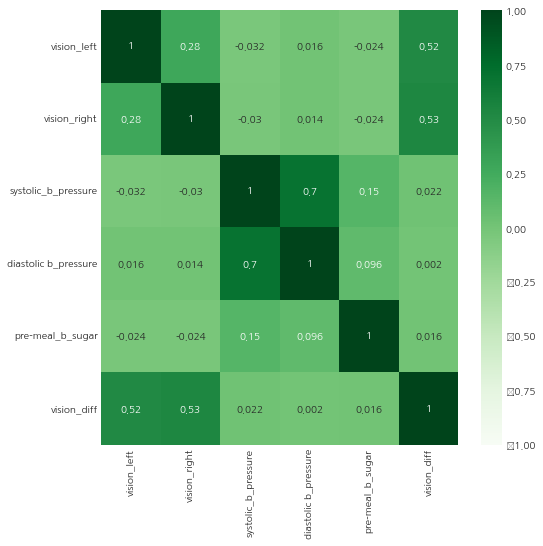

In [26]:
import seaborn as sb
plt.figure(figsize = (8,8))
sb.heatmap(df_for_corr.corr(),
                    annot = True, 
                     cmap = 'Greens',
                     vmin = -1, vmax = 1)

- 좌우 시력은 혈압 및 공복혈당 수치와 상관 정도가 매우 낮음